# Time series decomposition

We'll be looking at weather data from Stornoway Station, and decompose the $T$ variable.

In [56]:
!pip3 install pandas plotly statsmodels matplotlib

    100% |████████████████████████████████| 13.2MB 251kB/s ta 0:00:011  41% |█████████████▎                  | 5.5MB 4.1MB/s eta 0:00:02
  Using cached https://files.pythonhosted.org/packages/df/93/8bc9b52a8846be2b9572aa0a7c881930939b06e4abe1162da6a0430b794f/kiwisolver-1.1.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
    100% |████████████████████████████████| 71kB 436kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl


In [57]:
import pandas as pd
from plotly import express as px
from statsmodels.tsa import seasonal

In [58]:
df = pd.read_csv("data/HanfordMonthly.csv")[["midMonth", "meanTemp"]]

In [59]:
fig = px.line(df, x="midMonth", y="meanTemp")
fig

In [60]:
df.index = df.midMonth

In [73]:
decomp = seasonal.seasonal_decompose(list(df["meanTemp"]), freq=12, model="additive")

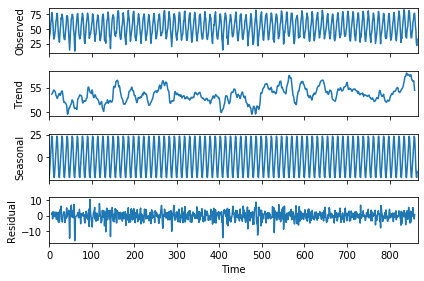

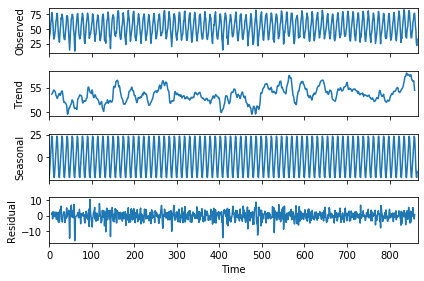

In [74]:
decomp.plot()

In [75]:
df["seasonality"] = decomp.seasonal
df["trend"] = decomp.trend
df["residual"] = decomp.resid

In [77]:
df.to_csv("hanford_decomposed.csv")